In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

In [18]:
train = pd.read_csv('DataCleaning/train.csv')
train

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,admission_age,temperature,...,resprate,o2sat,sbp,dbp,pain,acuity,chiefcomplaint,stay_length_minutes,pain_cleaned_advanced,race_condensed
0,13693110,NaN,34656289,2130-01-13 16:59:00,2130-01-13 20:38:00,F,WHITE,WALK IN,39.0,98.1,...,NaN,100.0,130.0,66.0,3,3.0,Palpitations,219.0,3.0,White
1,11211939,29843627.0,36379343,2156-11-07 04:31:00,2156-11-07 22:24:00,F,WHITE - RUSSIAN,WALK IN,91.0,97.1,...,NaN,94.0,166.0,73.0,yes,2.0,"Dizziness, s/p Fall",1073.0,NaN,White
2,17927957,NaN,37694994,2129-02-10 10:26:00,2129-02-10 13:41:00,F,WHITE,WALK IN,60.0,96.9,...,NaN,100.0,137.0,57.0,8,3.0,LEFT EYE HEMATOMA,195.0,8.0,White
3,12485364,NaN,30382138,2152-07-15 11:49:00,2152-07-15 16:04:00,F,HISPANIC/LATINO - PUERTO RICAN,WALK IN,43.0,98.1,...,NaN,97.0,99.0,77.0,0,3.0,Asthma exacerbation,255.0,0.0,HISPANIC/LATINO
4,19364518,27928048.0,34615303,2149-06-11 22:28:00,2149-06-12 17:26:00,F,WHITE,AMBULANCE,55.0,98.3,...,NaN,98.0,153.0,70.0,2,2.0,"Chest pain, Back pain",1138.0,2.0,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370144,14808097,NaN,33602224,2166-12-08 09:39:00,2166-12-08 11:54:00,M,ASIAN - SOUTH EAST ASIAN,WALK IN,18.0,100.5,...,NaN,100.0,132.0,89.0,3,3.0,"Body aches, Fever",135.0,3.0,ASIAN
370145,12142966,NaN,30198559,2166-07-12 20:05:00,2166-07-13 01:31:00,M,OTHER,WALK IN,22.0,97.4,...,NaN,100.0,129.0,76.0,3,3.0,"BRBPR, Chest pain",326.0,3.0,OTHER
370146,11192814,NaN,32879061,2129-05-09 08:04:00,2129-05-09 14:46:00,M,WHITE - OTHER EUROPEAN,WALK IN,78.0,96.0,...,NaN,100.0,157.0,77.0,2,2.0,"s/p Fall, Syncope",402.0,2.0,White
370147,10990338,27775107.0,38870217,2133-11-15 10:58:00,2133-11-16 12:48:00,M,WHITE,AMBULANCE,82.0,96.8,...,NaN,96.0,147.0,80.0,0,2.0,"n/v/d, Presyncope",1550.0,0.0,White


In [19]:
train_df = pd.read_csv('DataCleaning/train_imputed.csv')

In [20]:
train_df

,admission_age,temperature,heartrate,resprate,o2sat,sbp,dbp,acuity,stay_length_hours,pain_cleaned_advanced,...,arrival_transport_UNKNOWN,arrival_transport_WALK IN,race_condensed_AMERICAN INDIAN/ALASKA NATIVE,race_condensed_ASIAN,race_condensed_BLACK,race_condensed_HISPANIC/LATINO,race_condensed_Missing,race_condensed_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,race_condensed_OTHER,race_condensed_White
0,1.502591,-0.096703,-1.134618,-0.637975,-0.973963,-1.298205,0.006754,0.544617,-0.138610,-1.155919,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.292809,-0.307618,-0.008943,0.166199,0.683379,-0.401036,0.136693,0.544617,-0.011935,1.274389,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.357018,0.114211,-0.965767,0.166199,-0.145292,0.361557,-0.513005,-0.876510,-0.625046,-1.155919,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.098712,0.957869,1.735854,0.166199,0.683379,1.572734,0.699766,-0.876510,0.276886,-1.155919,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.147236,0.008754,-0.740632,-0.637975,0.269044,-0.580470,-0.166499,0.544617,-0.108208,-0.615851,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370195,0.386531,0.114211,2.354975,0.166199,0.683379,1.707309,0.439886,0.544617,-0.526238,1.004354,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
370196,1.648164,-0.048117,-0.290362,0.166199,-0.973963,0.854999,-0.383066,0.544617,0.236350,1.004354,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
370197,-1.214772,0.430583,-0.290362,0.166199,0.269044,-0.984196,-0.729572,1.965744,1.941406,-1.155919,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
370198,0.532104,0.008754,-0.571780,0.166199,0.683379,-0.804762,0.266633,0.544617,2.237828,0.464286,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [4]:
import pandas as pd
import numpy as np
import joblib as jl

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

train = pd.read_csv('/Users/tzjsw/Downloads/Erdos/Project-Treatment-Time/Emergency-Department-Wait-Times-/DataCleaning/train.csv')
train = train.drop(columns = ['subject_id', 'hadm_id', 'stay_id', 'race', 'pain', 'intime', 'outtime', 'chiefcomplaint'])

train['race_condensed'] = train['race_condensed'].fillna('Missing')

numeric_vars = ['admission_age', 'temperature', 'heartrate', 'resprate', 'o2sat', 
                'sbp', 'dbp', 'acuity', 'pain_cleaned_advanced']
# categorical_vars = ['gender', 'arrival_transport', 'race_condensed']

numeric = Pipeline(steps=[
    ('imputer', IterativeImputer(max_iter=100, random_state=2025)),
    # ('scaler', StandardScaler())
])

categorical = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

impute_standardize = ColumnTransformer(
    transformers=[
        ('num', numeric, numeric_vars),
        # ('cat', categorical, categorical_vars)
    ])


In [5]:
model = Pipeline(steps=[
    ('pre', impute_standardize), 
    ('lin_reg', LinearRegression())
]
)

In [6]:
# Random Forest Pipeline
rf_pipeline = Pipeline([
    ('preprocessor', impute_standardize),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# XGBoost Pipeline
xgb_pipeline = Pipeline([
    ('preprocessor', impute_standardize),
    ('model', XGBRegressor(n_estimators=100, learning_rate=0.2, random_state=42))
])


In [7]:
X_train = train.drop(columns='stay_length_minutes')

In [8]:
y_train = train['stay_length_minutes']

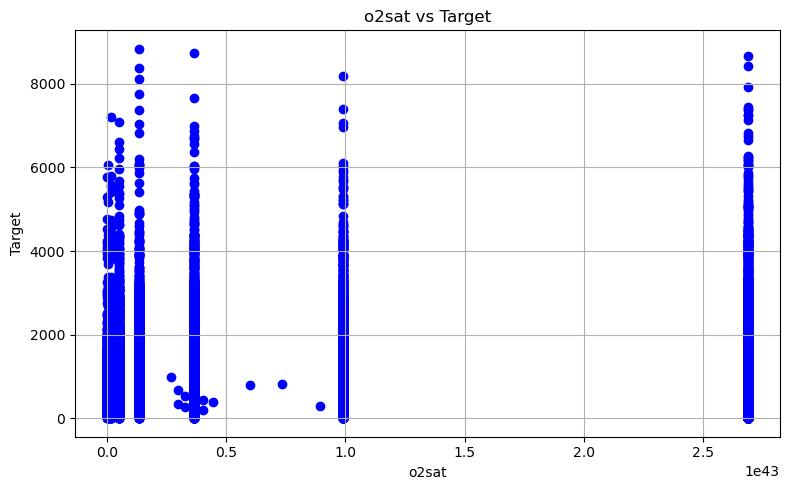

In [ ]:
# # feature_names = ['temperature', 'heartrate', 'resprate', 'o2sat', 
# #                 'sbp', 'dbp']
# feature_names = ['o2sat']

# # Create subplots
# num_features = len(feature_names)
# fig, axes = plt.subplots(num_features, 1, figsize=(8, 5 * num_features))

# # Loop through features and plot each one
# for i, feature in enumerate(feature_names):
#     ax = axes[i] if num_features > 1 else axes
#     ax.scatter(np.exp(X_train[feature]), y_train, color='blue', label=feature)
#     ax.set_xlabel(feature)
#     ax.set_ylabel('Target')
#     ax.set_title(f'{feature} vs Target')
#     ax.grid(True)

# plt.tight_layout()
# plt.show()

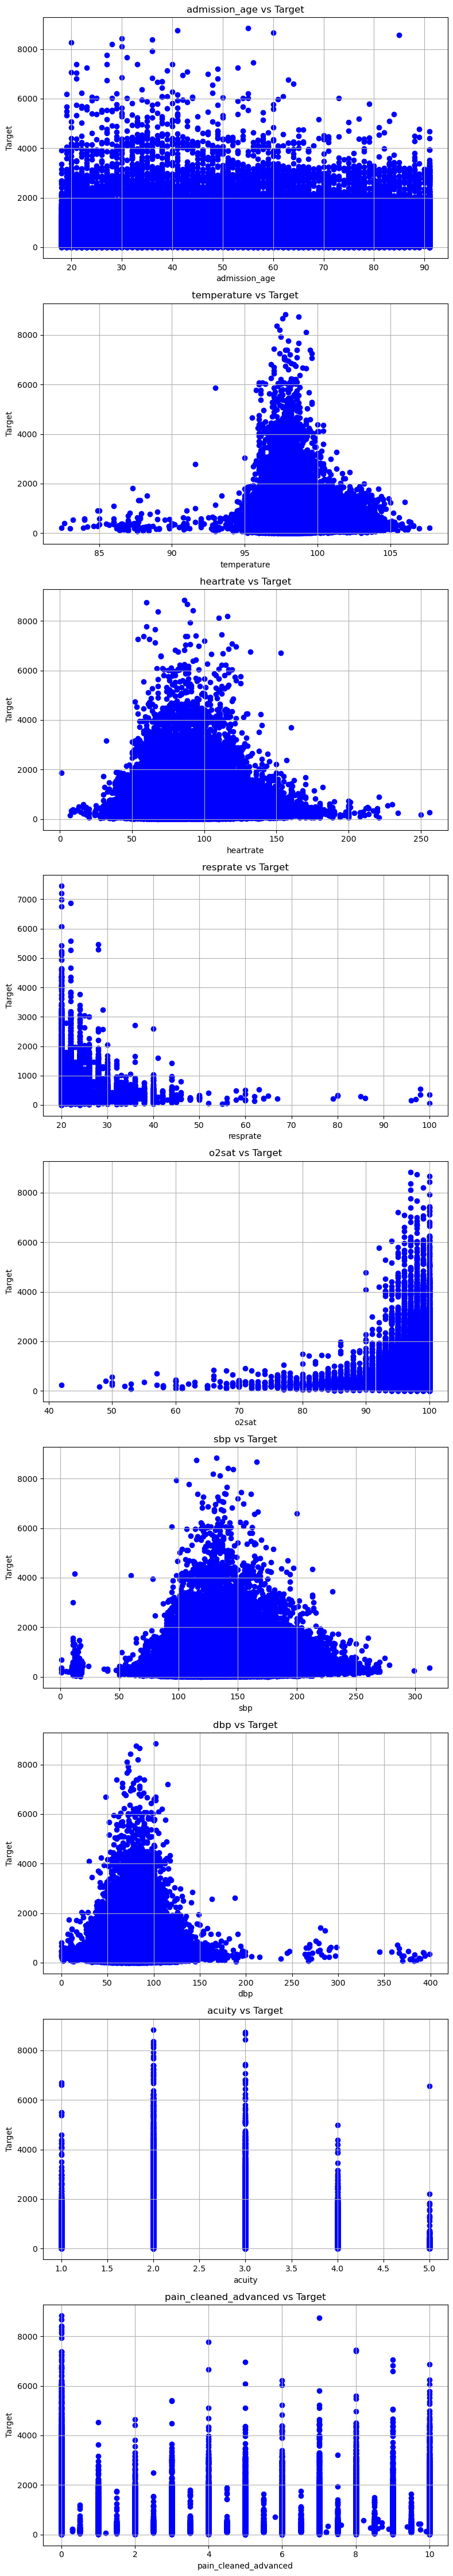

In [10]:
feature_names = ['admission_age', 'temperature', 'heartrate', 'resprate', 'o2sat', 
                'sbp', 'dbp', 'acuity', 'pain_cleaned_advanced']

# Create subplots
num_features = len(feature_names)
fig, axes = plt.subplots(num_features, 1, figsize=(8, 5 * num_features))

# Loop through features and plot each one
for i, feature in enumerate(feature_names):
    ax = axes[i] if num_features > 1 else axes
    ax.scatter(X_train[feature], y_train, color='blue', label=feature)
    ax.set_xlabel(feature)
    ax.set_ylabel('Target')
    ax.set_title(f'{feature} vs Target')
    ax.grid(True)

plt.tight_layout()
plt.show()

In [11]:
model.fit(X_train, y_train)
model.named_steps['lin_reg'].coef_

array([  1.62353421,  -2.00861613,   0.43261037,  -7.9049232 ,
        -1.97537079,   0.15438611,   0.40964548, -68.11848218,
         0.31354118])

In [12]:
X_train.columns

Index(['gender', 'arrival_transport', 'admission_age', 'temperature',
       'heartrate', 'resprate', 'o2sat', 'sbp', 'dbp', 'acuity',
       'pain_cleaned_advanced', 'race_condensed'],
      dtype='object')

In [13]:
# model.named_steps['lin_reg'].coef_
# array([ 4.47609090e-01, -3.59362895e-02,  1.44191135e-01, -1.80445865e-01,
#         9.28732953e-03,  8.76175070e-02,  7.07184175e-02, -7.02582014e-01,
#         3.12331747e-02,  3.78903709e-02, -3.78903709e-02,  1.75568606e+00,
#        -1.96630032e+00,  2.08787362e+00, -2.48834785e+00,  6.11088487e-01,
#         9.09309946e-01, -9.83425934e-02,  4.20979990e-01,  3.28129160e-01,
#        -1.72997773e+00, -2.04971397e-03, -1.80075295e-03,  1.73751696e-01])

In [14]:
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
print(mse, r2)

151674.72951768446 0.02272835327708833


In [15]:
# rf_pipeline.fit(X_train, y_train)
# y_pred_rf = rf_pipeline.predict(X_train)
# mse_rf = mean_squared_error(y_train, y_pred_rf)
# r2_rf = r2_score(y_train, y_pred_rf)
# print(mse_rf, r2_rf)

In [16]:
# test = pd.read_csv('DataCleaning/test.csv')
# X_test = test.drop(columns='stay_length_hours')
# y_test = test['stay_length_hours']
# y_pred_rf_test = rf_pipeline.predict(X_test)
# mse = mean_squared_error(y_test, y_pred_rf_test)
# r2 = r2_score(y_true=y_test, y_pred=y_pred_rf_test)
# print(mse, r2)

In [17]:
xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_train)
mse_xgb = mean_squared_error(y_train, y_pred_xgb)
r2_xgb = r2_score(y_train, y_pred_xgb)
print(mse_xgb, r2_xgb)

140019.93067753696 0.09782263227105359
